# LGMVIP-Data Science internship nov(2023)
# task-03

## Prediction using Decision Tree Algorithm

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt 
sns.set(color_codes=True) 
%matplotlib inline  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv(r"C:\Users\Sanjana\OneDrive\Desktop\task3\IRIS.csv",encoding='ISO-8859-1')

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
data.isnull().values.any()

False

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Visualzation

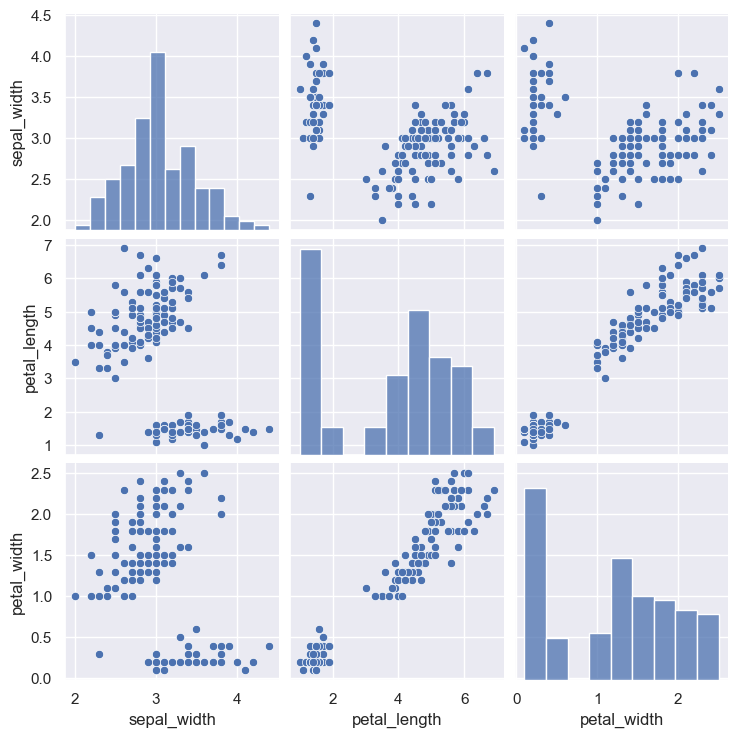

In [10]:
sns.pairplot(data.iloc[:,1:])

In [11]:
# dublicates
dupes = data.duplicated()
dupes

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

<Axes: >

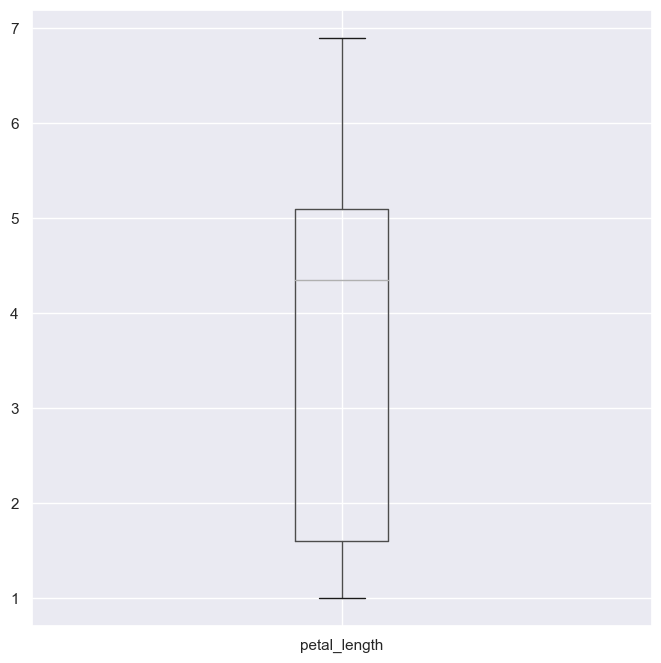

In [69]:
data.boxplot(column='petal_length',figsize=(8,8))

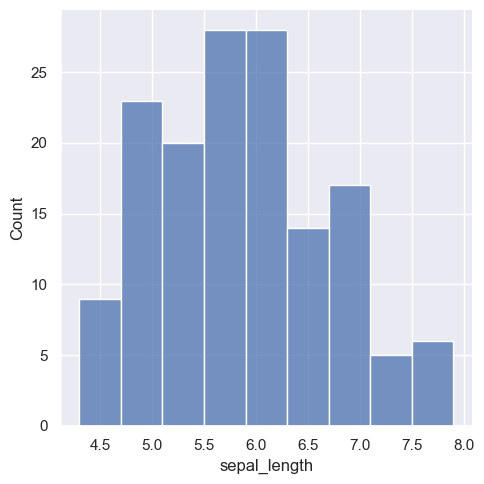

In [13]:
sns.displot(data['sepal_length'])

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

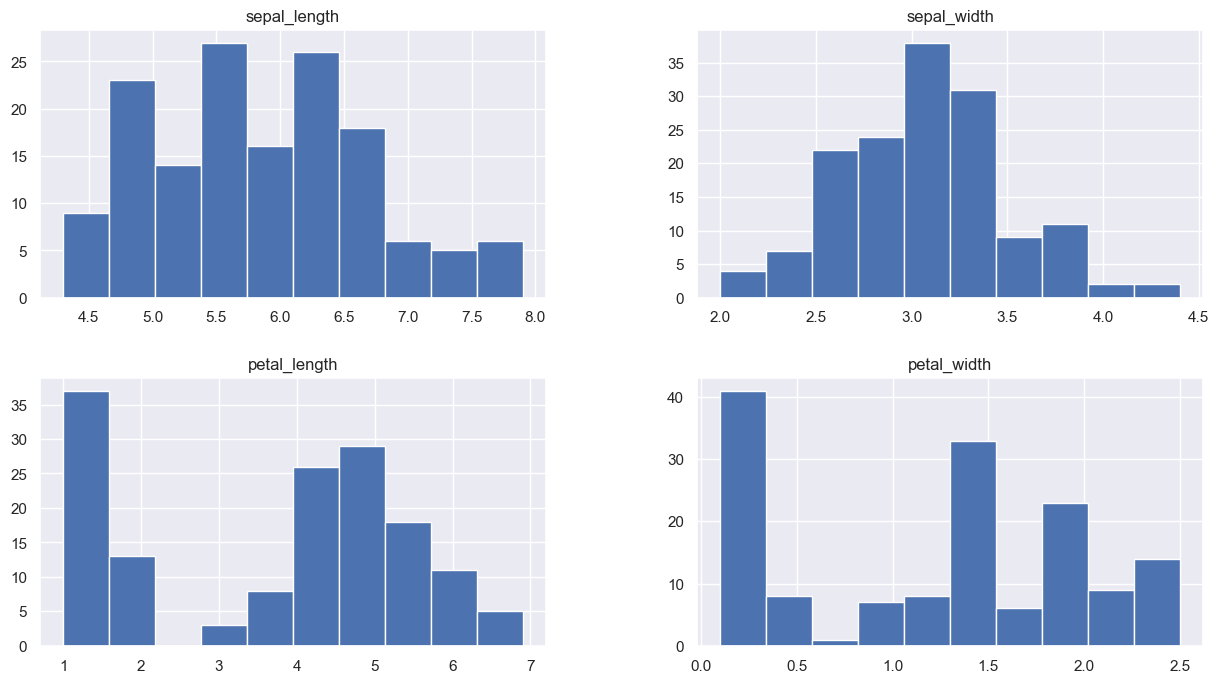

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

data.hist(figsize=(15,8))

In [67]:
pd.crosstab(data['sepal_width'],data['petal_length'] )

petal_length,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.9,3.0,...,5.7,5.8,5.9,6.0,6.1,6.3,6.4,6.6,6.7,6.9
sepal_width,,,,,,,,,,,,,,,,,,,,,
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.5,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2.9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [9]:
pd.crosstab(data['petal_width'],data['sepal_length'] )

sepal_length,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,...,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.6,7.7,7.9
petal_width,,,,,,,,,,,,,,,,,,,,,
0.1,1,0,0,0,0,1,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0
0.2,0,3,0,3,2,3,1,5,3,2,...,0,0,0,0,0,0,0,0,0,0
0.3,0,0,1,1,0,1,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
0.4,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
0.5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0.6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1.0,0,0,0,0,0,0,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1.1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.head(15)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

<Axes: xlabel='sepal_width', ylabel='count'>

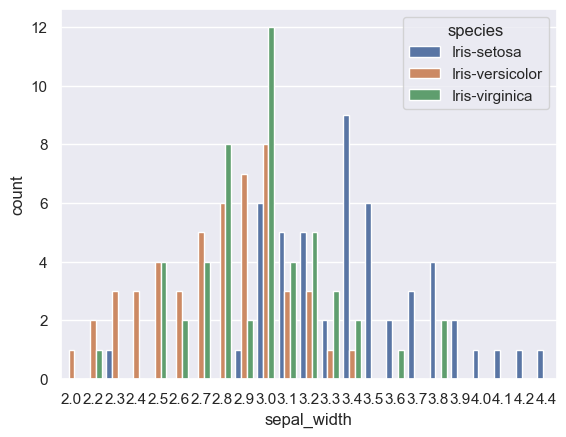

In [38]:
sns.countplot(x="sepal_width", hue="species", data=data)

<Axes: xlabel='petal_width', ylabel='count'>

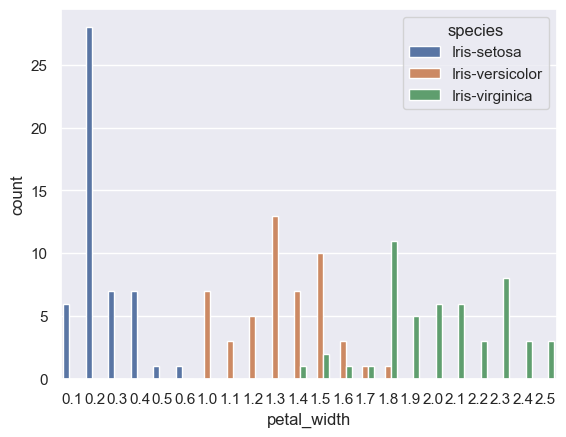

In [33]:

sns.countplot(x = "petal_width", hue="species", data = data ) 

C:\Users\Sanjana\AppData\Local\Temp\ipykernel_29040\148179261.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sepal_width'])


<Axes: xlabel='sepal_width', ylabel='Density'>

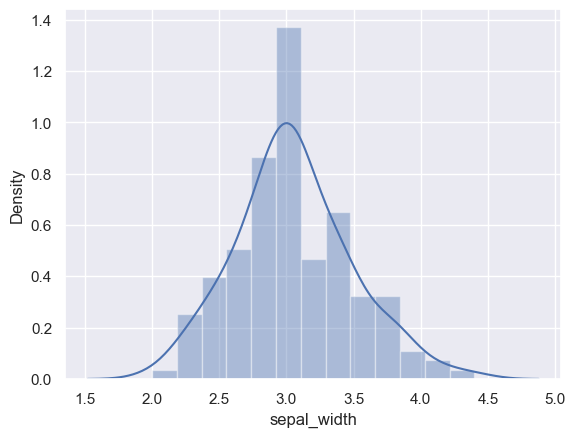

In [39]:
sns.distplot(data['sepal_width'])

C:\Users\Sanjana\AppData\Local\Temp\ipykernel_29040\2306870226.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['petal_length'])


<Axes: xlabel='petal_length', ylabel='Density'>

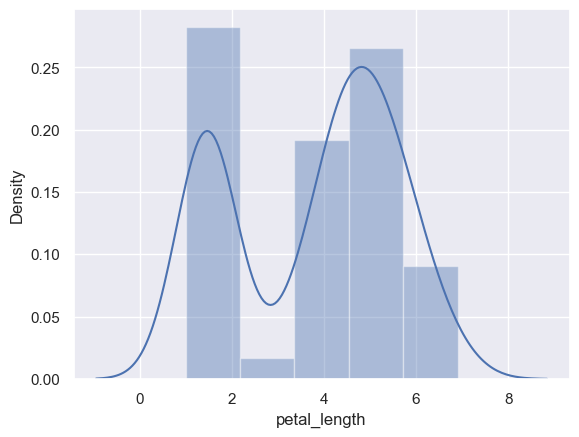

In [41]:
sns.distplot(data['petal_length'])

## Decision tree 

In [42]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [49]:
X = data[['sepal_length','sepal_width','petal_length','petal_width']].values
Y = data['species'].values

In [53]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1 )

In [54]:
# Build Decision tree Model 
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion='gini',random_state=1)
dTree.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=1)

In [61]:
# scorring our decision tree

print(dTree.score(x_test,y_test))


0.9555555555555556


# Accuracy = 95%

In [58]:
y_pred = dTree.predict(x_test)
print(y_pred)

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor']


## Visualizing Tree

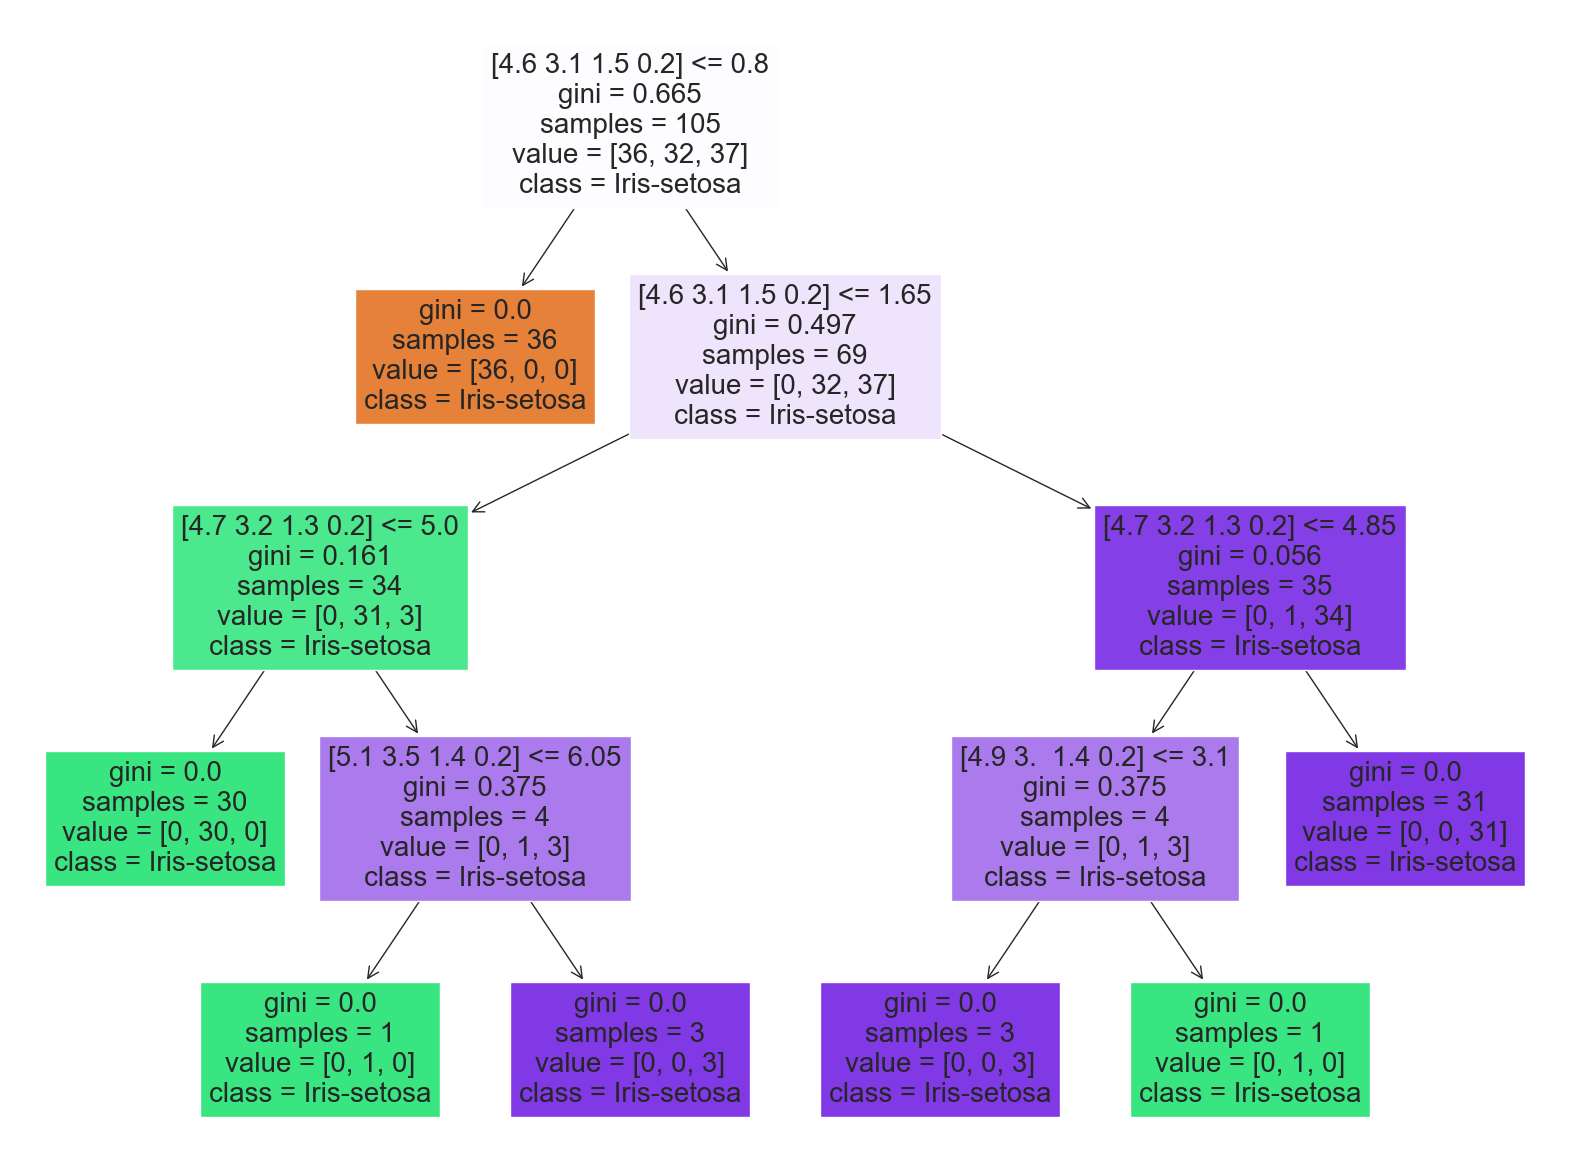

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(dTree, 
                   feature_names=X,  
                   class_names=Y,
                   filled=True)